# CMPINF0010 Final Project

## Introduction
The best neighboorhood is one that supports families, nature, and everything in between. Through the use of datasets measuuring the amount of respctive parks, playgrounds, fields, and greenways in different neighborhoods, we will determine which neigherhood best represents these qualities. The metric is defined as natural and familial livability, and whichever neighboorhood has the most total from each of the datasets will be crowned the best.

Used to import Geopandas and Numpy, as well as the general shapefile of Pittsburgh.
Using Geopandas and matplotlib, we analyzed the following datasets to make our decision on the best neighborhood in Pittsburgh:
1. City Parks https://data.wprdc.org/dataset/parks
2. Playgrounds https://data.wprdc.org/dataset/playgrounds
3. Fields https://data.wprdc.org/dataset/playing-fields
4. Greenways https://data.wprdc.org/dataset/greenways


In [2]:
import pandas as pd
import numpy as np
import geopandas
import csv
import collections
import matplotlib.pyplot as plt

#shp is shapefile
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

## **Greenways.csv**

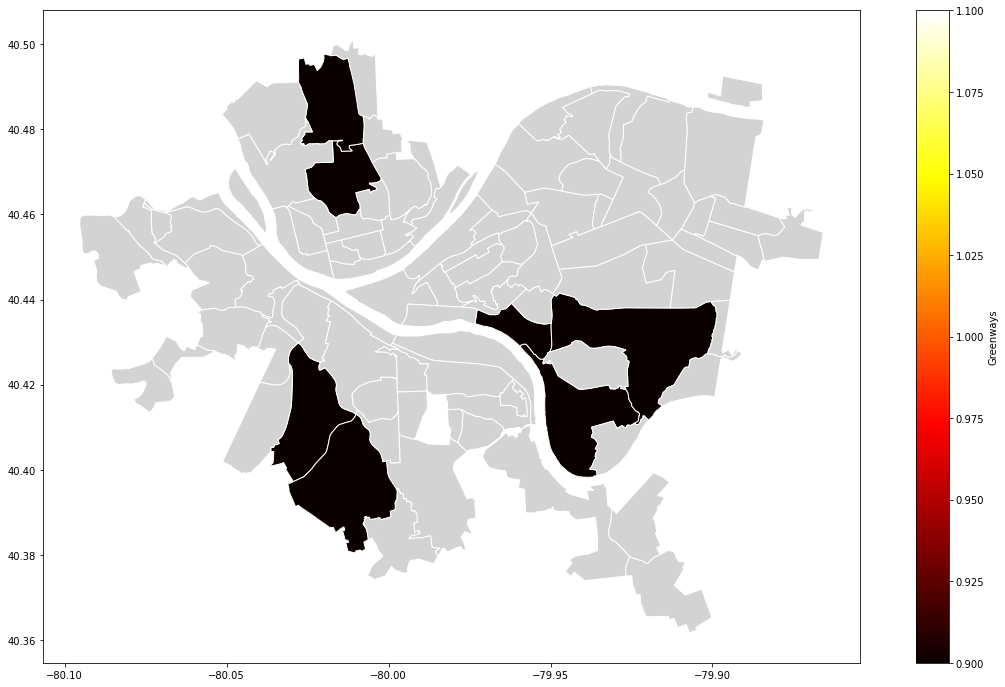

In [36]:
greenways = collections.Counter()
with open('Greenways.csv') as file:
    # Iterate over Greenways.csv
    for x in csv.reader(file, delimiter=','):
        # "neighborhood" is the 7th column
        greenways[x[9]] += 1

df1 = pd.DataFrame(greenways.most_common())
df1.columns=['Neighborhood', 'Number']
df1.groupby("Neighborhood").sum()['Number']

shaped1 = neighborhoods.merge(df1, how='left', left_on='hood', right_on='Neighborhood')
shaped1.plot(column='Number',
                    cmap='hot',
                    edgecolor="white",
                    legend=True,
                    legend_kwds={'label':"Greenways"},
                    figsize=(20,12),
                    missing_kwds={"color": "lightgrey"})
# In order to set labels on geopandas graph, we have to use matplotlib
# and 'show' the axis labels
plt.tick_params(axis='y', which='Neighborhood Coordinates', labelsize=20, bottom =False, top=False, labelbottom=False)
plt.show()

## **Playfields.csv**

,Neighborhood,Number
0,Brighton Heights,7
1,South Side Slopes,6
2,Brookline,6
3,Squirrel Hill South,5
4,Carrick,5
5,Lower Lawrenceville,4
6,Hazelwood,4


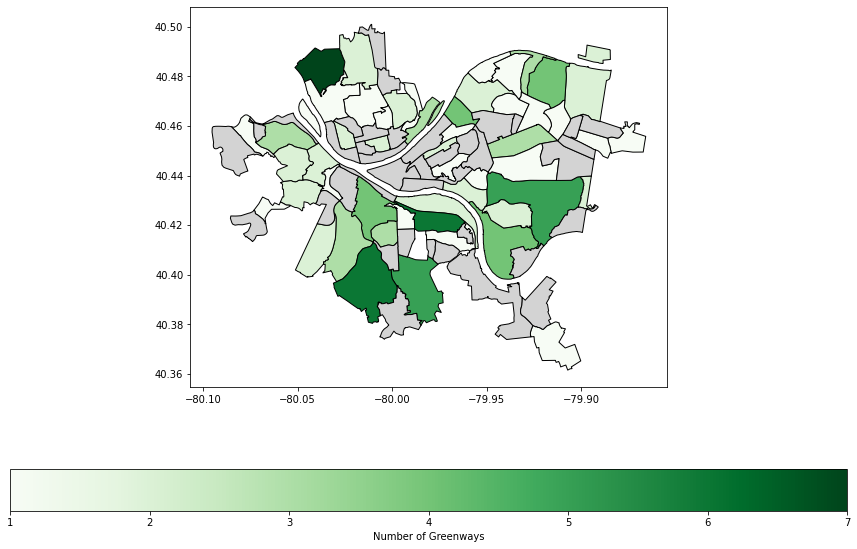

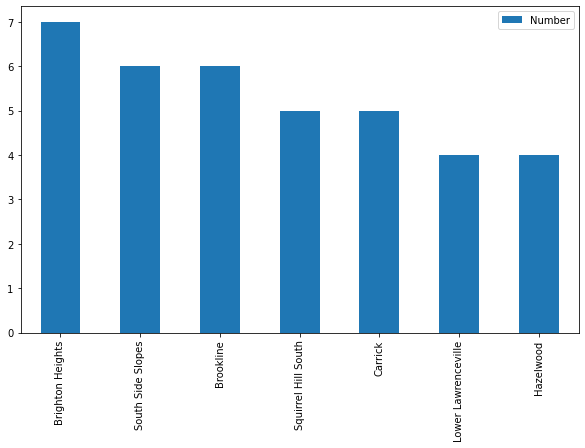

In [32]:
# Create counter object to tally number of greenways per neighborhood
fields = collections.Counter()
with open('Playfields.csv') as file:
    # Iterate over Playfields.csv
    for x in csv.reader(file,delimiter=','):
        # "neighborhood" is the 11th column of the csv
        fields[x[11]] += 1

# most_common() converted to dataframe organizes and sorts data in ascending order
df2 = pd.DataFrame(fields.most_common())
# Rename dataframe column names before grouping and visualization
df2.columns=['Neighborhood', 'Number']
df2.groupby("Neighborhood").sum()['Number']

shaped2 = neighborhoods.merge(df2, how='left', left_on='hood', right_on='Neighborhood')
shaped2.plot(column='Number',
                    cmap='Greens',
                    edgecolor="black",
                    legend=True,
                    legend_kwds={'label':"Number of Greenways",
                                  'orientation': "horizontal"},
                    figsize=(15,10),
                    missing_kwds={"color":"lightgrey"})

# .head() gets top values from DataFrame
topValues = df2.head(7)
ax = topValues.plot(kind="bar", figsize=(10,6))
ax.set_xticklabels(['Brighton Heights', 'South Side Slopes', 'Brookline', 'Squirrel Hill South', 'Carrick', 'Lower Lawrenceville', 'Hazelwood'])
# Display topValues as table
display(topValues)

## **Playgrounds.csv**

,Neighborhood,Number
0,Squirrel Hill South,8
1,Beechview,5
2,South Side Slopes,5
3,Allegheny Center,4
4,Highland Park,4


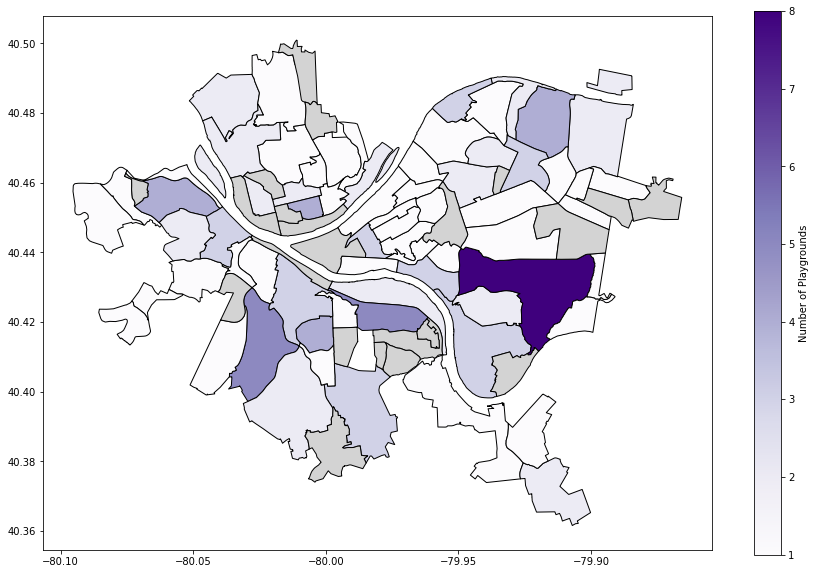

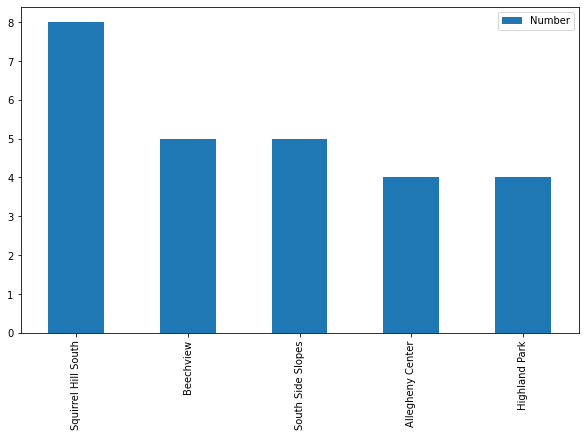

In [29]:
playgrounds = collections.Counter()
with open('Playgrounds.csv') as file:
    for x in csv.reader(file, delimiter=','):
        playgrounds[x[7]] += 1

df3 = pd.DataFrame(playgrounds.most_common())
df3.columns=['Neighborhood', 'Number']
df3.groupby("Neighborhood").sum()['Number']

shaped3 = neighborhoods.merge(df3, how='left', left_on='hood', right_on='Neighborhood')
shaped3.plot(column='Number',
                    cmap='Purples',
                    edgecolor="black",
                    legend=True,
                    legend_kwds={'label':"Number of Playgrounds"},
                    figsize=(15,10),
                    missing_kwds={"color":"lightgrey"})

# .head() gets top values from DataFrame
topValues = df3.head()
ax = topValues.plot(kind="bar", figsize=(10,6))
ax.set_xticklabels(['Squirrel Hill South', 'Beechview', 'South Side Slopes', 'Allegheny Center', 'Highland Park'])
# Display topValues as table
display(topValues)

## **CityParks.csv**

,Neighborhood,Number
0,East Liberty,12
1,Central Business District,10
2,Beechview,8
3,South Side Slopes,7
4,Point Breeze,7
...,...,...
69,New Homestead,1
70,West Oakland,1
71,Bluff,1
72,Middle Hill,1


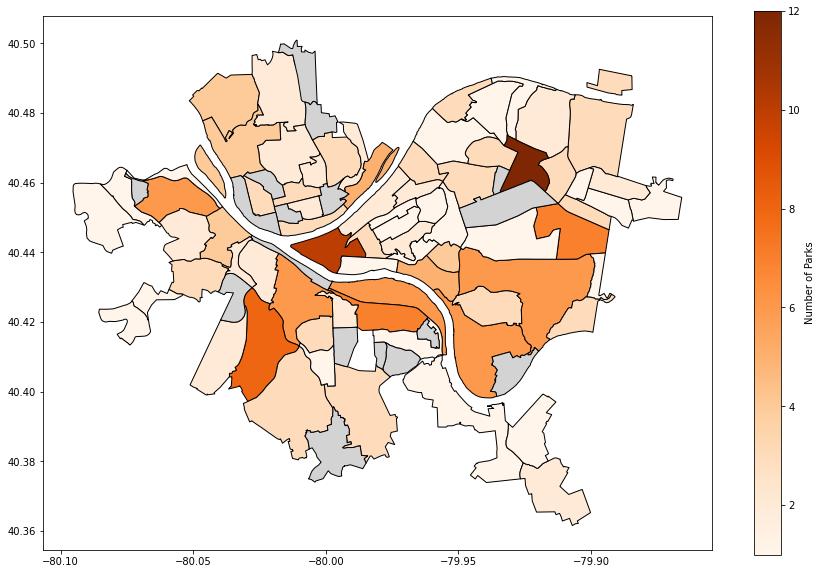

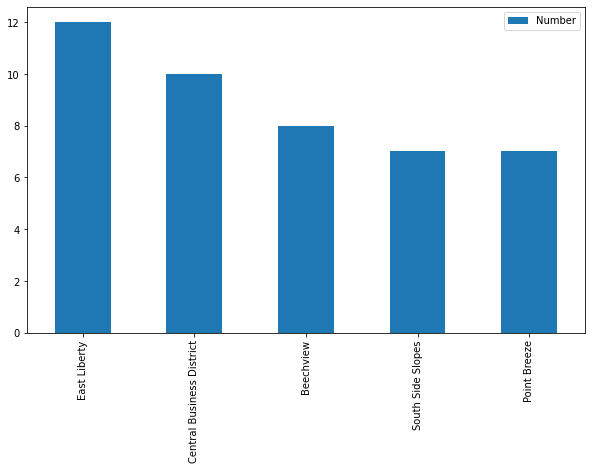

In [23]:
parks = collections.Counter()
with open('CityParks.csv') as file:
    for x in csv.reader(file, delimiter=','):
        parks[x[5]] += 1

df4 = pd.DataFrame(parks.most_common())
df4.columns=['Neighborhood', 'Number']
df4.groupby("Neighborhood").sum()['Number']

shaped4 = neighborhoods.merge(df4, how='left', left_on='hood', right_on='Neighborhood')

shaped4.plot(column='Number',
                    cmap='Oranges',
                    edgecolor="black",
                    legend=True,
                    legend_kwds={'label':"Number of Parks"},
                    figsize=(15,10),
                    missing_kwds={"color":"lightgrey"})

# .head() gets top values from DataFrame
topValues = df4.head()
ax = topValues.plot(kind="bar", figsize=(10,6))
ax.set_xticklabels(['East Liberty', 'Central Business District', 'Beechview', 'South Side Slopes', 'Point Breeze'])

# Display DataFrame as table
display(df4)

## **Combined Datasets**

,Neighborhood,Number
0,East Liberty,12
1,Central Business District,10
2,Beechview,8
3,South Side Slopes,7
4,Point Breeze,7


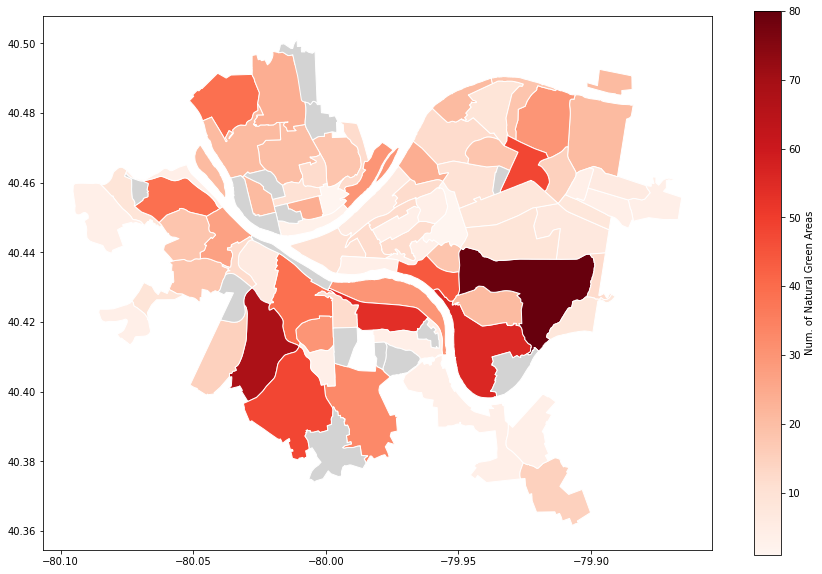

In [18]:
# Use Counter from collections class to keep tally number of playfields per neighborhood
greenways = collections.Counter()
with open('Greenways.csv') as file:
    # Iterate over Greenways.csv
    for x in csv.reader(file, delimiter=','):
        # "neighborhood" is the 7th column
        greenways[x[9]] += 1

fields = collections.Counter()
with open('Playfields.csv') as file:
    # Iterate over Playfields.csv
    for x in csv.reader(file,delimiter=','):
        # "neighborhood" is the 11th column of the csv
        fields[x[11]] += 1

playgrounds = collections.Counter()
with open('Playgrounds.csv') as file:
    for x in csv.reader(file, delimiter=','):
        playgrounds[x[7]] += 1


parks = collections.Counter()
with open('CityParks.csv') as file:
    for x in csv.reader(file, delimiter=','):
        parks[x[5]] += 1


combinedSet = playgrounds.most_common() + fields.most_common() + parks.most_common() + greenways.most_common()

# Convert the new combined list to a pandas dataframe
df = pd.DataFrame(combinedSet)
# Make list of headers to be used for the new csv
headers = ['Neighborhood', 'Number']
# Now able to convert dataframe to csv for easier visualization
df.to_csv('combinedSet.csv', index=False, header=headers)

df = pd.read_csv('combinedSet.csv', header=0)
df['Total'] = df.groupby(['Neighborhood'])['Number'].transform('sum')

headers2 = ['Neighborhood', 'Single Number', 'Combined Total']
df.to_csv('combinedTotals.csv', index=False,header=headers2)


df5 = pd.read_csv("combinedTotals.csv")
# Dataframe containing the totals of greenways, playgrounds, and fields per neighborhood
combineddf = df5.groupby("Neighborhood").sum()['Combined Total']
# Merge with the Pittsburgh shapefile
combined_map = neighborhoods.merge(combineddf, how='left', left_on='hood', right_on='Neighborhood')

# .head() gets top values from DataFrame
topValues = df4.head()
# Display topValues as table
display(topValues)

# Create new plot as summary of previous three
combined_map.plot(column='Combined Total',
                  cmap='Reds',
                  edgecolor="white",
                  legend=True,
                  legend_kwds={'label':"Num. of Natural Green Areas"},
                  figsize=(15,10),
                  missing_kwds={"color": "lightgrey"})

plt.show()

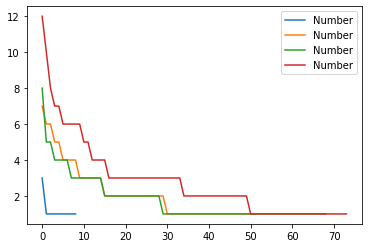

In [160]:
# Comparison between number of playgrounds and parks
ax = df1.plot()
df2.plot(ax=ax)
df3.plot(ax=ax)
df4.plot(ax=ax)

        Neighborhood      Single Number  Combined Total
0    Squirrel Hill South        8              19      
1              Beechview        5              16      
2      South Side Slopes        5              18      
3       Allegheny Center        4               8      
4          Highland Park        4              10      
..                   ...            ...             ...
190        New Homestead        1               2      
191         West Oakland        1               2      
192                Bluff        1               2      
193          Middle Hill        1               2      
194  Squirrel Hill North        1               3      

[195 rows x 3 columns]


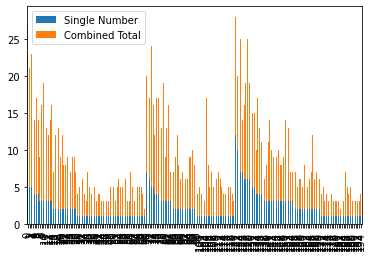

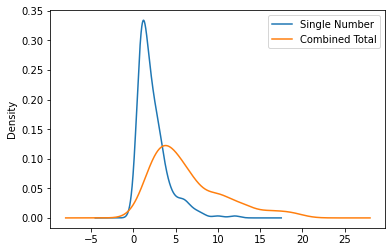

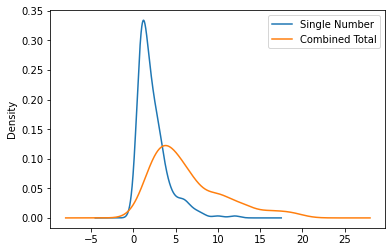

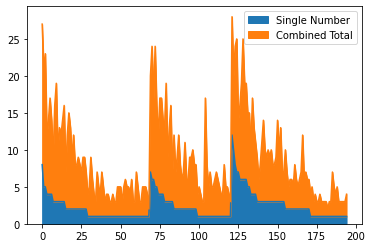

In [154]:
df5.sort_values(by=['Combined Total'],ascending=True)
df5.drop_duplicates(keep=False)
print(df5)
df5.plot.bar(stacked=True)
df5.plot.kde()
df5.plot.density()
df5.plot.area()



## **Conclusion**
In conclusion, the best neighborhood gives room for people and animals to have fun. The winner and best neighborhood is Squirrel hill south. In relation to the metric, it has the most amount of fields, parks, greenways, and playgrounds for all people to enjoy.